In [70]:
from os import listdir
from YFunc import YFuncExtraction, WriteLog, GUI
from HPIB.HPT import Plot2P
from HPIB.DevParams import UMC
from datetime import datetime
from tkinter import filedialog
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt


In [55]:
%gui tk

path=filedialog.askdirectory(title='Choose a file')

In [104]:
now=datetime.now().strftime('%Y%m%d %H%M')

root, prefix = path.rsplit('/', 1)

Dispbar=display('', display_id=True)

if 't' in prefix.lower():
    with open(f"{root}/Parameters {now}.log", 'w') as myfile:
        myfile.write('temp,LIN,Vth,SS,migm,miyf,theta1,theta2,errmax%\n')

if 'cb' in prefix.lower():
    with open(f"{root}/{prefix}/Parameters2P {now}.log", 'w') as myfile:
        myfile.write('temp,res\n')
    with open(f"{root}/{prefix}/Parameters4P {now}.log", 'w') as myfile:
        myfile.write('temp,res\n')

for file in listdir(path):
    Dispbar.update(f"{root}/{file}")
    if file.endswith('csv'):
        meas, temp, _ =file.rsplit(' - ')
        temp=float(temp)

        if 't' in prefix.lower():
            try:
                LIN, Vth, SS, migm, miyf, theta1, theta2, errmax=YFuncExtraction(f"{root}/{file}",UMC[int(prefix[2:])], 3.2, 3.9, 5, 1, 'Vg', 'Id')
                WriteLog(f"{root}/", temp, now, LIN, Vth, SS, migm, miyf, theta1, theta2, errmax)
            except: continue

        if 'd' in prefix.lower():
            try:
                TreatDiode()
            except: continue
    
        if '4P' in file or '2P' in file:
            Res=Plot2P(f"{root}/{prefix}/{file}")
            plt.close('all')
            with open(f"{root}/{prefix}/Parameters{meas} {now}.log", 'a') as myfile:
                myfile.write(f"{format(temp, '7.3f')},{format(Res, '7.3f') if Res > 1 else format(Res, '.4e')}\n")

'C:/Users/Zucchi-Note/Dropbox/Cryochip/Medidas/PostFix/241007 TN4 TN7 TN12 TP11/Cooldown/Parameters4P 20241024 1839.log'

In [112]:
df=pd.read_csv(f"{root}/{prefix}/Parameters4P {now}.log")
temp=df['temp']
res=df['res']

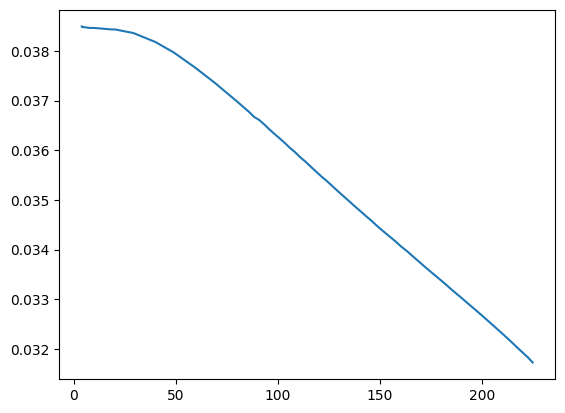

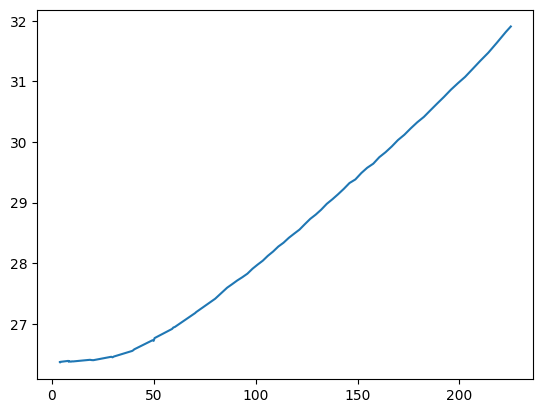

In [120]:
if 'cb' in prefix.lower():
        
    plt.close('all')
    df=pd.read_csv(f"{root}/{prefix}/Parameters4P {now}.log")
    temp=df['temp'][df['temp'] < 250]
    res=df['res'][:len(temp)]

    fig1, ax1 = plt.subplots()
    ax1.plot(temp, res)

    df=pd.read_csv(f"{root}/{prefix}/Parameters2P {now}.log")
    temp=df['temp'][df['temp'] < 250]
    res=df['res'][:len(temp)]

    fig2, ax2 = plt.subplots()

    ax2.plot(temp, res)

In [109]:
res

0     26.370
1     26.365
2     26.376
3     26.391
4     26.378
       ...  
63    30.522
64    30.634
65    30.742
66    30.862
67    30.971
Name: res, Length: 68, dtype: float64

In [111]:
format(1e-4, '.4e')

'1.0000e-04'